In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,normalize
from PIL import *
from PIL import Image

In [2]:
set_1 = pd.read_csv('mean_ratings_set1.csv')
set_2 = pd.read_csv('mean_ratings_set2.csv')

In [3]:
#Removendo linhas que possuam atributo target == Happy e atributo target == Sad, pois são multiclasse

set_1 = set_1[set_1['TARGET'] != 'HAPPY']
set_2 = set_2[set_2['TARGET'] != 'HAPPY']

set_1 = set_1[set_1['TARGET'] != 'SAD']
set_2 = set_2[set_2['TARGET'] != 'SAD']

set_2 = set_2.drop(['soundtrack', 'link','Number'], axis=1) #Possuem colunas do tipo string --> não  são necessária para o PCA
set_1 = set_1.drop(['number'],axis=1)



In [4]:
set_1.head()

,valence,energy,tension,anger,fear,happy,sad,tender,TARGET
60,5.80,2.80,2.4,1.0,1.0,5.83,2.00,7.83,TENDER
61,6.83,4.33,2.5,1.0,1.0,2.20,2.80,7.60,TENDER
62,5.83,2.00,2.0,1.0,1.0,1.60,4.40,7.40,TENDER
63,6.60,2.40,1.2,1.0,1.0,4.17,1.50,7.17,TENDER
64,6.40,3.20,1.8,1.0,1.0,4.50,2.17,7.17,TENDER


In [5]:
set_2.head()

,Valence,Energy,Tension,Anger,Fear,Happy,Sad,Tender,Beauty,Liking,TARGET
0,2.56,7.73,8.38,6.39,4.40,1.21,1.75,1.01,4.71,4.97,ANGER_HIGH
1,2.50,8.21,8.56,5.76,5.93,1.09,1.60,1.10,4.57,4.79,ANGER_HIGH
2,2.92,8.21,8.17,6.31,4.06,1.31,1.55,1.01,4.45,5.06,ANGER_HIGH
3,2.88,6.75,7.98,5.42,4.51,1.19,2.10,1.06,4.00,4.35,ANGER_HIGH
4,3.08,6.83,7.50,6.13,4.24,1.07,2.96,1.07,5.08,5.35,ANGER_HIGH


In [6]:

#Pegar os valores únicos de target --> Usando estrutura de dados SET python


targets_values_set1 = set((set_1['TARGET'].values))
targets_values_set2 = set((set_2['TARGET'].values))

targets_values = targets_values_set1 | targets_values_set2

targets_values


{'ANGER',
 'ANGER_HIGH',
 'ANGER_MODERATE',
 'ENERGY NEG HIGH',
 'ENERGY NEG MODERATE',
 'ENERGY POS HIGH',
 'ENERGY POS MODERATE',
 'FEAR',
 'FEAR_HIGH',
 'FEAR_MODERATE',
 'HAPPY_HIGH',
 'HAPPY_MODERATE',
 'HIGH ENERGY',
 'HIGH TENSION',
 'HIGH VALENCE',
 'LOW ENERGY',
 'LOW TENSION',
 'LOW VALENCE',
 'SAD_HIGH',
 'SAD_MODERATE',
 'SURPRISE',
 'TENDER',
 'TENDER_HIGH',
 'TENDER_MODERATE',
 'TENSION NEG HIGH',
 'TENSION NEG MODERATE',
 'TENSION POS HIGH',
 'TENSION POS MODERATE',
 'VALENCE NEG HIGH',
 'VALENCE NEG MODERATE',
 'VALENCE POS HIGH',
 'VALENCE POS MODERATE'}

In [7]:
#DECLARAÇÃO DE VARIAVEIS GLOBAIS PARA USO EM OUTROS FUNCOES


#Obter sentimentos base usando o target_values declarado anteriormente
modificadores = ['LOW','HIGH','MODERATE','POS','NEG'] #modificadores que não são sentimentos base
sents_base = []
for i in targets_values:   # Retira os modificadores e coloca os sentimentos base em uma lista
    for i  in (i.replace(" ","_")).split("_"):
        if i not in modificadores:
            sents_base.append(i)
sents_base = set(sents_base) #retirando duplicatas


#classificar os targets_values em 9 cores diferentes emm formato rgb

cor = [(1,0,0),(0,0,1),(1,1,0),(0,1,0),(1,0,1),(0,1,1),(0.5,0.5,0.5),(0.5,0.5,0),(0.5,0,0.5)]


sents_cor = {} #Criar um dicionário com os sentimentos base e suas respectivas cores

count = 0
for  i in sents_base:
    sents_cor[i] = cor[count] #atribuindo cores aos sentimentos base  
    count += 1
    

In [8]:
# METODOS COMPLEMENTARES PARA TRANSFORMAÇÃO LINEAR 
    
  
def rgb_resultante (rgb_base,rgb_linear):
    #Essa daqui faz o  ajuste final do vetor já normalizado e multiplicado pelas constantes  para o formato rgb
    
    rgb_r = [0,0,0]
    
    
    
    for i in range(len(rgb_base)):
        rgb_r[i] = rgb_base[i] * rgb_linear[i] * 255
    
    return rgb_r



def Padroniza_RGB_Base(sents):    
    #Vou receber um sentimento do dataframe ex: HIGH VALENCE
    #Devo retornar o rgb base contido em sents_cor com uma pequena variação de intensidade
    
    
    sents_decomposto = []
    sets_mods = []
    for i  in (sents.replace(" ","_")).split("_"):
        if i not in modificadores:
            sents_decomposto.append(i)
        else:
            sets_mods.append(i)
            
    #print(sents_decomposto)
    
    #print(sets_mods)
            
    if sets_mods == []:  
        #return sents_cor[sents_decomposto[0]] #sents cor [VALENCE] = (1,0,0) por exemplo
        return [abs(x * 1.00) for x in sents_cor[sents_decomposto[0]]]
    
    elif sets_mods[0] == "LOW":
        
        #return np.array(sents_cor[sents_decomposto[0]]) * 0.85 
        """
        sents_cor[sents_decomposto[0]][0] = sents_cor[sents_decomposto[0]][0] * 0.85
        sents_cor[sents_decomposto[0]][1] = sents_cor[sents_decomposto[0]][1] * 0.85
        sents_cor[sents_decomposto[0]][2] = sents_cor[sents_decomposto[0]][2] * 0.85
        """
        
        return [abs(x * 0.9) for x in sents_cor[sents_decomposto[0]]]
        
        
        
    elif sets_mods[0] == "HIGH":
        
        #return np.array(sents_cor[sents_decomposto[0]]) * 1.15
        """
        sents_cor[sents_decomposto[0]][0] = sents_cor[sents_decomposto[0]][0] * 1.15
        sents_cor[sents_decomposto[0]][1] = sents_cor[sents_decomposto[0]][1] * 1.15
        sents_cor[sents_decomposto[0]][2] = sents_cor[sents_decomposto[0]][2] * 1.15
        """
        
        return [abs(x * 1.1) for x in sents_cor[sents_decomposto[0]]]
        
        
    
    elif sets_mods[0] == "MODERATE":
        
        #return np.array(sents_cor[sents_decomposto[0]]) * 1.00
        """
        sents_cor[sents_decomposto[0]][0] = sents_cor[sents_decomposto[0]][0] * 1.00
        sents_cor[sents_decomposto[0]][1] = sents_cor[sents_decomposto[0]][1] * 1.00
        sents_cor[sents_decomposto[0]][2] = sents_cor[sents_decomposto[0]][2] * 1.00
        """
        
        return [abs(x * 1.00) for x in sents_cor[sents_decomposto[0]]]
        
        

    elif sets_mods[0] == "POS":
                
        #return np.array(sents_cor[sets_mods[0]]) * 1.10
        """
        sents_cor[sents_decomposto[0]][0] = sents_cor[sents_decomposto[0]][0] * 1.10
        sents_cor[sents_decomposto[0]][1] = sents_cor[sents_decomposto[0]][1] * 1.10
        sents_cor[sents_decomposto[0]][2] = sents_cor[sents_decomposto[0]][2] * 1.10
        """
        
        return [abs(x * 1.10) for x in sents_cor[sents_decomposto[0]]]
        
      
    
    elif  sets_mods[0] == "NEG": #ALterar tônica de rgb quando tag neg for ativa
        
        
        
        """
        sents_cor[sents_decomposto[0]][0] = 1 - sents_cor[sents_decomposto[0]][0]
        sents_cor[sents_decomposto[0]][1] = 1 - sents_cor[sents_decomposto[0]][1]
        sents_cor[sents_decomposto[0]][2] = 1 - sents_cor[sents_decomposto[0]][2]
        """
        
        # Formula --> R = 1 - ((G+B)/2)   G = 1 - ((R+B)/2)   B = 1 - ((R+G)/2)        
        return [abs(1 - ((sents_cor[sents_decomposto[0]][1] + sents_cor[sents_decomposto[0]][2])/2)),abs(1 - ((sents_cor[sents_decomposto[0]][0] + sents_cor[sents_decomposto[0]][2])/2)),abs(1 - ((sents_cor[sents_decomposto[0]][0] + sents_cor[sents_decomposto[0]][1])/2))]
        
        
        


In [9]:
def Transformacao_Linear(df):
    #Eu recebo um dataframe com as métricas e os targets, e aplico a transformação linear junto com outras funções pra adaptar os dados para o PCA
    
    
    
    
    #Separando os dados em x e y    
    y = df['TARGET']  # em y ficam os targets
    x = df.drop(columns= ['TARGET'], axis=1) # em x ficam as métricas

    

    #Normalizar valores em uma mesma escala
    Normalizado = StandardScaler()
    Normalizado.fit(x)
    escalonado = Normalizado.transform(x)

    #Apos normalização e escalonamento das métricas aplicar o pca
    num_components = 3
    pca = PCA(n_components = num_components)
    pca = pca.fit(escalonado)
    
    
    #transformando os dados em vetor rgb
    x = pca.transform(escalonado)
    
    #Normalizando os dados
    x = normalize(x)

    count = 0
    rgb = []
    for i in x:
        
        i = abs(i)
        
        rgb.append(rgb_resultante(Padroniza_RGB_Base(y.iloc[count]) ,i))   # Problema cabeludo aqui
        count += 1
    return rgb
    
    
    
    

In [10]:
# T(set_1) = s1  e T(set_2) = s2


s1  = Transformacao_Linear(set_1)


In [11]:
s2 = Transformacao_Linear(set_2)

In [12]:
print(s1)

[[0.0, 90.17067707087318, 0.0], [0.0, 32.33408061897454, 0.0], [0.0, 84.8394296672353, 0.0], [0.0, 58.5611864837636, 0.0], [0.0, 72.11090031684905, 0.0], [0.0, 56.276640475453725, 0.0], [0.0, 96.43336350770039, 0.0], [0.0, 51.979630166596685, 0.0], [0.0, 76.1104791725338, 0.0], [0.0, 12.138316709220238, 0.0], [0.0, 16.994243927628883, 0.0], [0.0, 80.52958163462112, 0.0], [0.0, 63.81432076900338, 0.0], [0.0, 89.39105072595578, 0.0], [0.0, 69.88649577397331, 0.0], [0.0, 76.35689324204853, 0.0], [0.0, 137.23413571422245, 0.0], [0.0, 47.38745525565086, 0.0], [0.0, 68.36522350167128, 0.0], [0.0, 71.2223254184735, 0.0], [0.0, 117.08921573249856, 0.0], [0.0, 3.1666503621423474, 0.0], [0.0, 147.18456123129246, 0.0], [0.0, 164.39497009406384, 0.0], [0.0, 149.4041694008344, 0.0], [0.0, 92.47580163018092, 0.0], [0.0, 177.35472227228726, 0.0], [0.0, 19.17756900637547, 0.0], [0.0, 117.17293459903046, 0.0], [0.0, 103.92071860716445, 0.0], [123.7842456331529, 14.331396779914023, 26.987434101224483], 

In [13]:
print(s2)

[[129.24628749823802, 3.9793783248747547, 0.0], [134.76009608461405, 2.629173150813865, 0.0], [128.35414236505966, 8.296542448308495, 0.0], [139.9584438989601, 8.482678574025844, 0.0], [115.07414912684594, 28.97234628593338, 0.0], [113.87723109187355, 57.34305701221737, 0.0], [102.68500169613338, 3.6374890707280914, 0.0], [47.75436491034527, 73.03106486398379, 0.0], [106.18300631585346, 35.23937939951475, 0.0], [121.31462495843324, 25.01817307090156, 0.0], [135.7764224086779, 13.01440351445415, 32.64124567266451], [140.1774248738381, 4.496059331547945, 0.37081832031125367], [139.59185767751092, 2.521997615230549, 13.334740273822959], [133.1593549688076, 1.8308586187655478, 43.99200655811447], [130.91118232260715, 16.818743428823588, 47.4284167179605], [125.3992508277874, 17.61353106166617, 14.867461631676811], [113.07574571335734, 30.355885590464002, 50.48411573343449], [117.65622344911574, 6.16777905890723, 48.73624508691916], [71.05926645656201, 82.18245336756497, 66.7298659457917], 

In [41]:
#retorne um quadrado vermelho de 100x100

def quadrado_(cor):
    
   
    
    img = Image.new('RGB', (100, 100), (int(cor[0]),int(cor[1]),int(cor[2])))
    
    
    return img

def Mostrar(Image):
    
    for i in range(len(Image)):
        display(Image[i])

In [42]:
# Criar espectro de cores para os vetores rgb dentro de s1 e s2
Images1 = []
Images2 = []

for i in s1:
    Images1.append(quadrado_(i))
    
for i in s2:
    Images2.append(quadrado_(i))
    

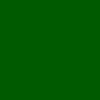

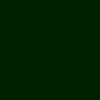

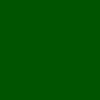

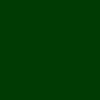

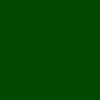

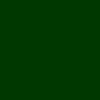

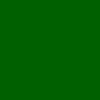

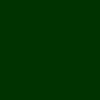

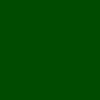

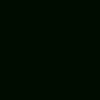

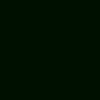

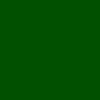

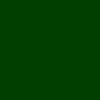

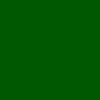

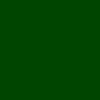

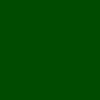

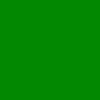

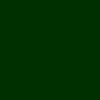

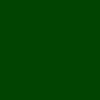

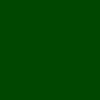

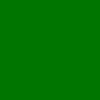

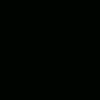

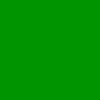

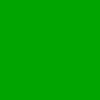

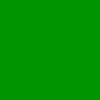

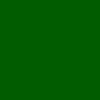

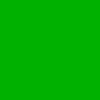

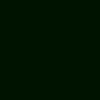

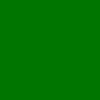

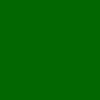

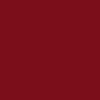

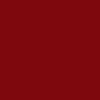

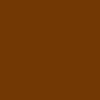

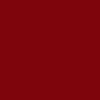

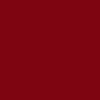

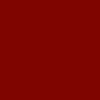

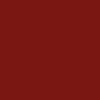

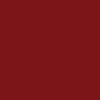

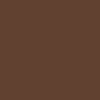

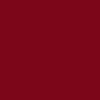

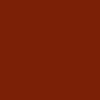

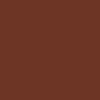

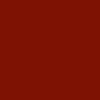

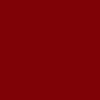

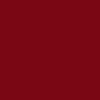

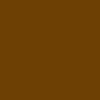

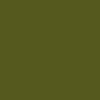

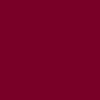

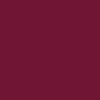

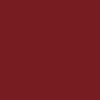

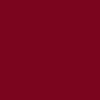

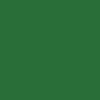

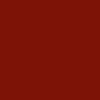

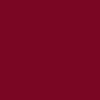

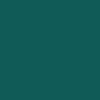

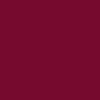

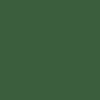

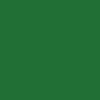

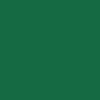

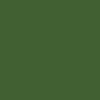

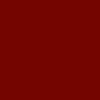

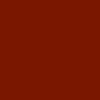

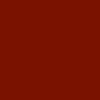

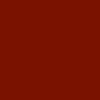

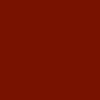

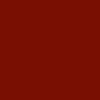

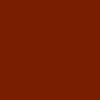

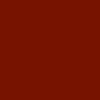

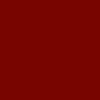

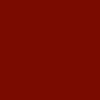

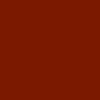

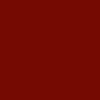

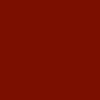

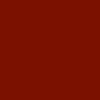

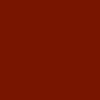

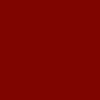

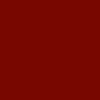

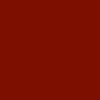

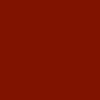

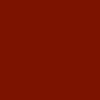

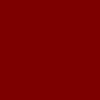

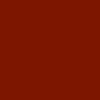

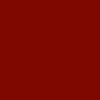

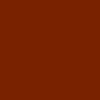

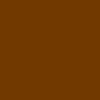

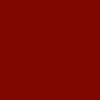

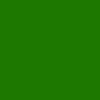

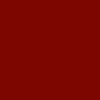

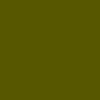

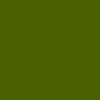

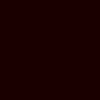

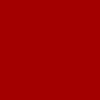

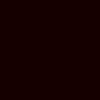

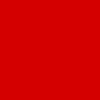

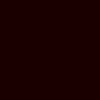

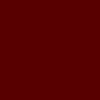

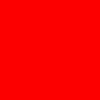

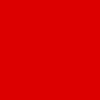

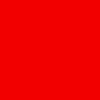

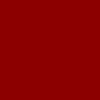

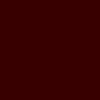

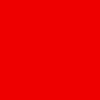

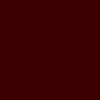

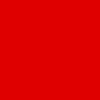

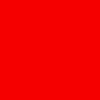

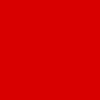

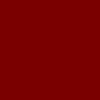

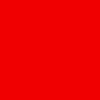

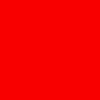

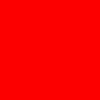

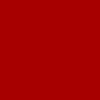

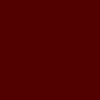

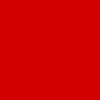

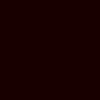

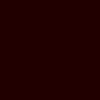

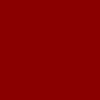

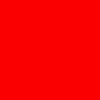

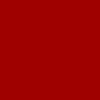

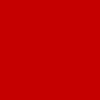

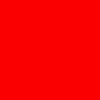

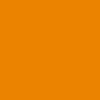

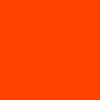

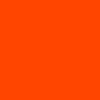

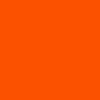

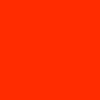

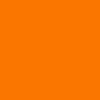

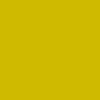

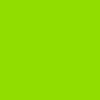

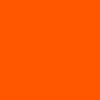

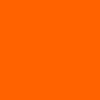

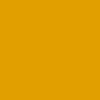

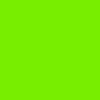

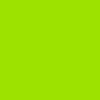

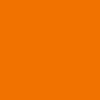

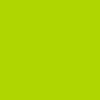

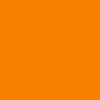

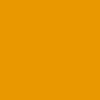

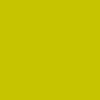

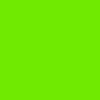

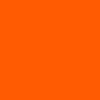

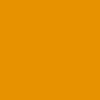

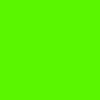

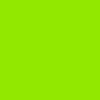

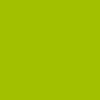

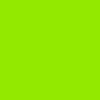

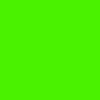

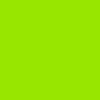

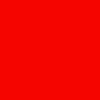

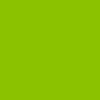

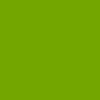

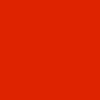

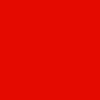

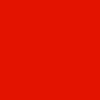

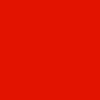

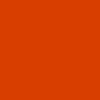

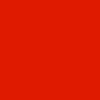

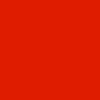

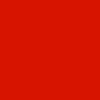

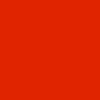

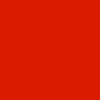

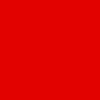

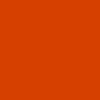

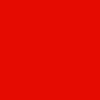

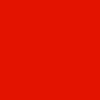

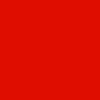

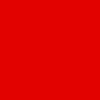

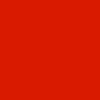

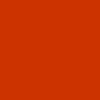

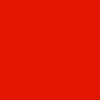

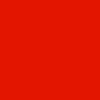

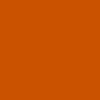

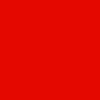

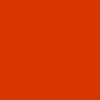

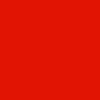

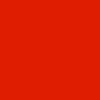

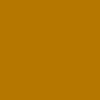

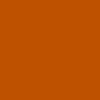

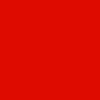

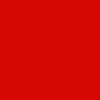

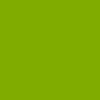

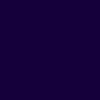

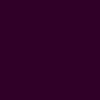

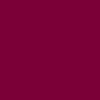

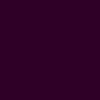

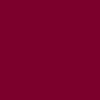

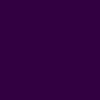

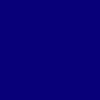

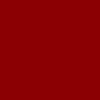

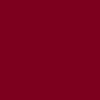

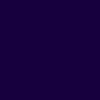

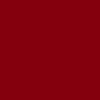

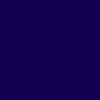

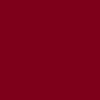

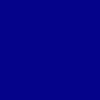

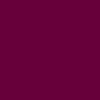

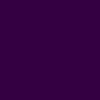

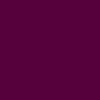

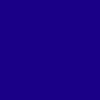

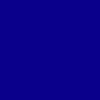

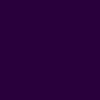

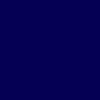

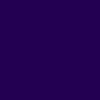

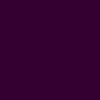

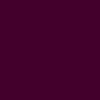

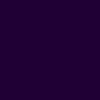

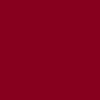

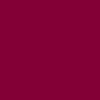

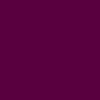

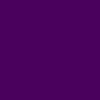

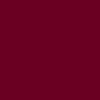

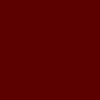

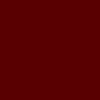

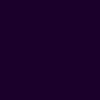

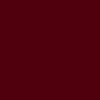

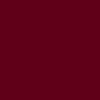

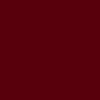

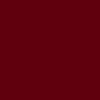

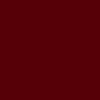

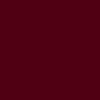

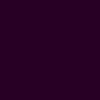

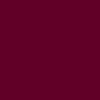

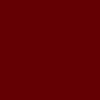

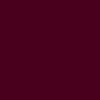

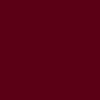

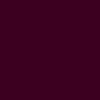

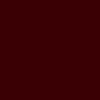

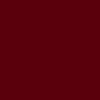

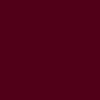

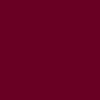

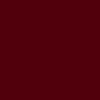

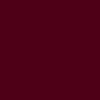

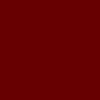

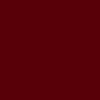

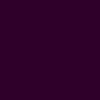

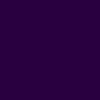

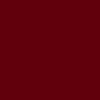

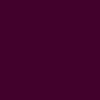

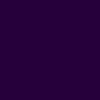

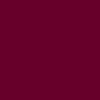

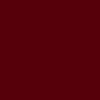

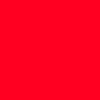

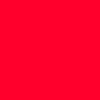

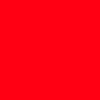

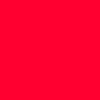

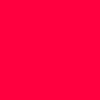

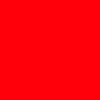

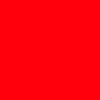

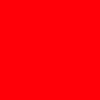

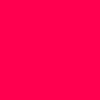

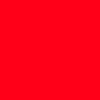

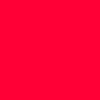

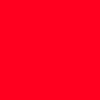

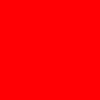

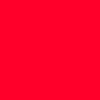

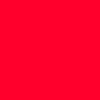

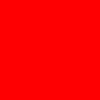

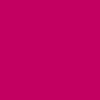

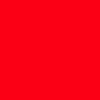

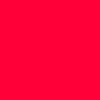

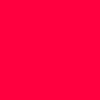

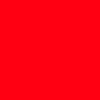

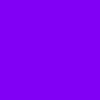

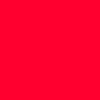

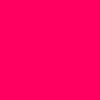

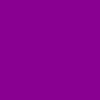

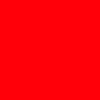

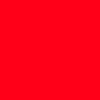

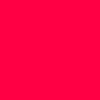

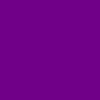

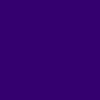

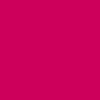

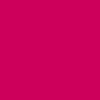

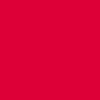

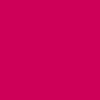

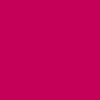

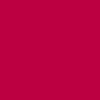

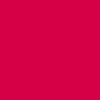

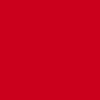

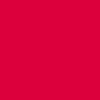

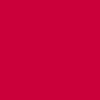

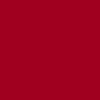

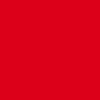

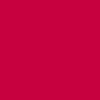

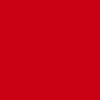

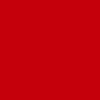

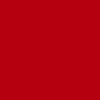

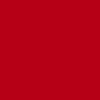

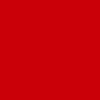

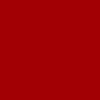

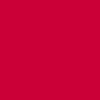

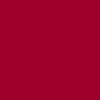

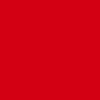

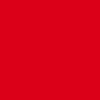

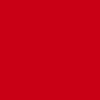

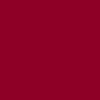

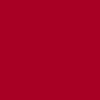

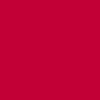

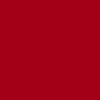

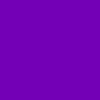

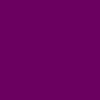

In [43]:
Mostrar(Images1)

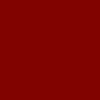

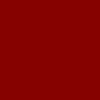

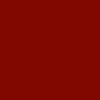

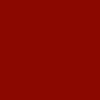

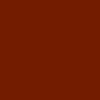

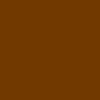

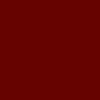

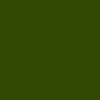

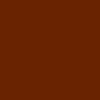

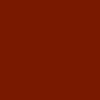

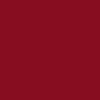

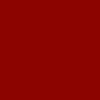

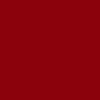

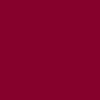

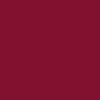

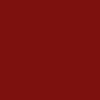

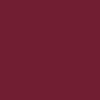

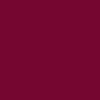

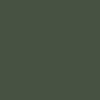

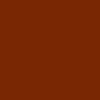

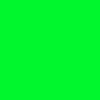

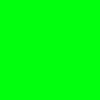

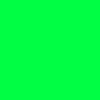

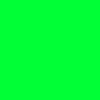

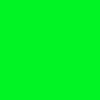

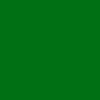

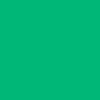

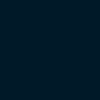

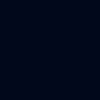

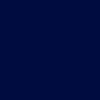

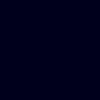

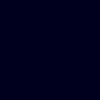

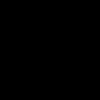

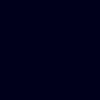

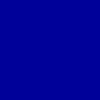

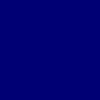

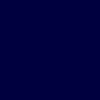

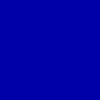

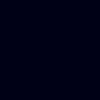

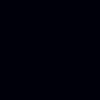

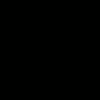

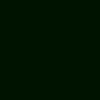

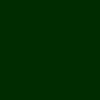

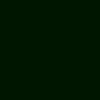

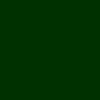

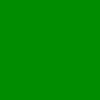

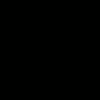

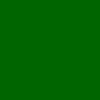

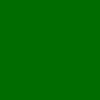

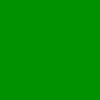

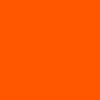

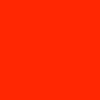

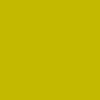

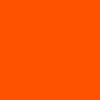

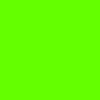

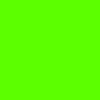

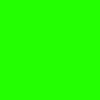

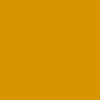

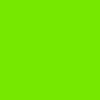

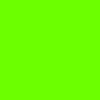

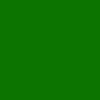

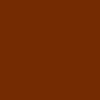

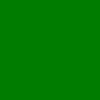

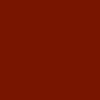

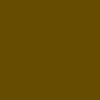

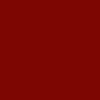

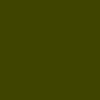

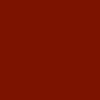

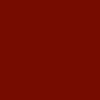

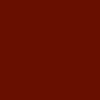

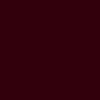

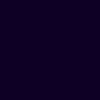

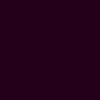

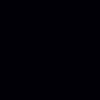

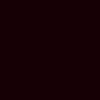

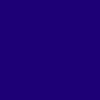

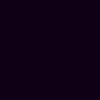

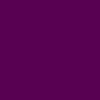

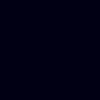

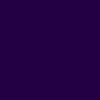

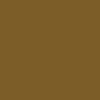

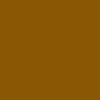

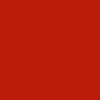

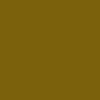

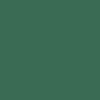

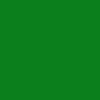

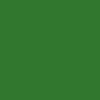

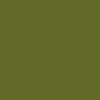

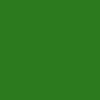

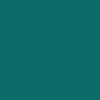

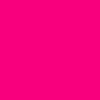

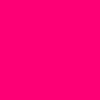

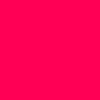

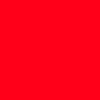

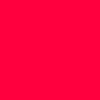

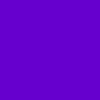

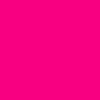

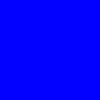

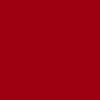

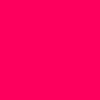

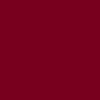

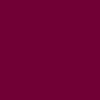

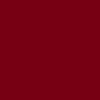

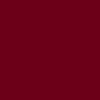

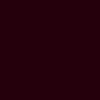

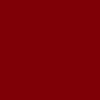

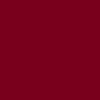

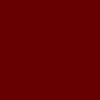

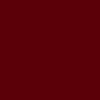

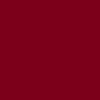

In [44]:
Mostrar(Images2)